## Dataset

令 $X_1,X_2,\cdots,X_n$ 服从参数为 $p$ 的伯努利分布，令 $n = 100, \epsilon = 0.2$，由**切比雪夫不等式**可得

$$
\mathbb{P}\left(\left|\bar{X}_{n}-p\right|>\varepsilon\right) \leqslant \frac{\mathbb{V}\left(\bar{X}_{n}\right)}{\varepsilon^{2}}=\frac{p(1-p)}{n \varepsilon^{2}} \leqslant \frac{1}{4 n \varepsilon^{2}}= 0.0625
$$

而若是使用 **Chernoff bound**，则

$$
\mathbb{P}\left(\left|\bar{X}_{n}-p\right|>\varepsilon\right) \leqslant 2 \mathrm{e}^{-2 n \varepsilon^{2}} = 0.00067
$$

> Ref: [All of Statistics：统计学完全教程](https://link.springer.com/book/10.1007/978-0-387-21736-9)

In [57]:
import numpy as np
def generate_prob(n = 100, p = 0.8, eps = 0.2):
    """
    @param: n (int): 子样个数
    @param: p (float): 伯努利分布成功概率
    @param: eps (float): 容忍偏差, bias
    """
    sample = [np.abs(np.random.binomial(n=1, p=p, size=n).mean() - p) for i in range(10000)] # 10000 仿真次数
    Prob = (np.array(sample) >= eps).mean()
    return Prob

generate_prob(n = 100, p = 0.8, eps = 0.2)

0.0

## Plots

In [79]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

### 动态改变 $\epsilon$

In [99]:
epsilon = np.linspace(start=0.02, stop=0.25, num=200)
various_eps = [generate_prob(n = 100, p = 0.8, eps = eps) for eps in epsilon] # fix n=100 and p = 0.8
upper_Chebyshev = [1.0 / (4 * 100 * eps ** 2) for eps in epsilon]
upper_Chernoff = [2 * math.exp(-2 * 100 * eps ** 2) for eps in epsilon]

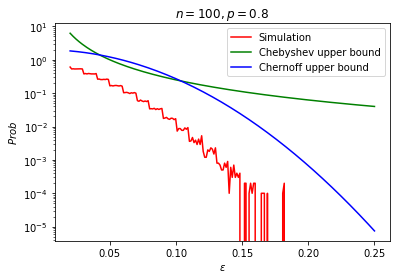

In [120]:
plt.semilogy(epsilon, various_eps, 'r-',label="Simulation")
plt.semilogy(epsilon, upper_Chebyshev, 'g-',label="Chebyshev upper bound")
plt.semilogy(epsilon, upper_Chernoff, 'b-',label="Chernoff upper bound")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel("$Prob$")
plt.title("$n = 100, p = 0.8$")
plt.savefig("./img/dynamic_eps.png", dpi=200)
plt.show()

### 动态改变 $n$

In [123]:
n_range = list(range(10,201))
various_n = [generate_prob(n = n, p = 0.8, eps = 0.14) for n in n_range] # fix eps = 0.14 and p = 0.8
upper_Chebyshev = [1.0 / (4 * n *  0.14 ** 2) for n in n_range]
upper_Chernoff = [2 * math.exp(-2 * n *  0.14 ** 2) for n in n_range]

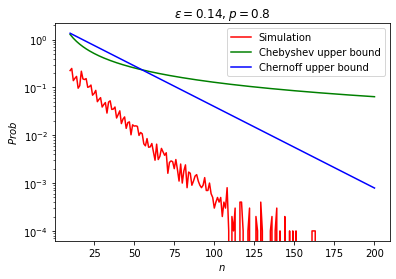

In [124]:
plt.semilogy(n_range, various_n, 'r-',label="Simulation")
plt.semilogy(n_range, upper_Chebyshev, 'g-',label="Chebyshev upper bound")
plt.semilogy(n_range, upper_Chernoff, 'b-',label="Chernoff upper bound")
plt.legend()
plt.xlabel("$n$")
plt.ylabel("$Prob$")
plt.title("$\epsilon = 0.14, p = 0.8$")
plt.savefig("./img/dynamic_n.png", dpi=200)
plt.show()

### 动态改变 $p$

值的注意的是 Chernoff upper bound 与 $p$ 无关，但是 Chebyshev upper bound 与 $p$ 有关

In [126]:
p_range = np.linspace(start=0.01, stop=0.99, num=200)
various_p = [generate_prob(n = 100, p = p, eps = 0.14) for p in p_range] # fix n=100 and eps = 0.14
upper_Chebyshev = [p * (1 - p) / (100 * 0.14 ** 2) for p in p_range]
upper_Chernoff = [2 * math.exp(-2 * 100 * 0.14 ** 2) for p in p_range]

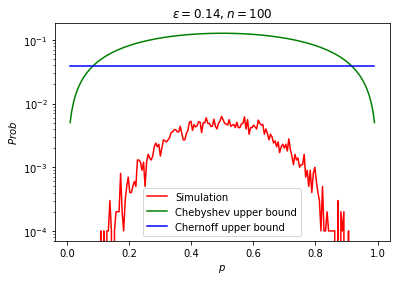

In [127]:
plt.semilogy(p_range, various_p, 'r-',label="Simulation")
plt.semilogy(p_range, upper_Chebyshev, 'g-',label="Chebyshev upper bound")
plt.semilogy(p_range, upper_Chernoff, 'b-',label="Chernoff upper bound")
plt.legend()
plt.xlabel("$p$")
plt.ylabel("$Prob$")
plt.title("$\epsilon = 0.14, n = 100$")
plt.savefig("./img/dynamic_p.png", dpi=200)
plt.show()

> 这图，，，似乎没啥用